# Book Recommender
In this project, I explore the process of building and fine-tuning a recommender system using the Surprise library in Python. My dataset consists of Goodreads book ratings, and my goal is to create a collaborative filtering-based recommender system that can predict user ratings for books. I will follow these key steps:

1. **Data Loading and Exploration**: I begin by loading the dataset and conducting some initial data exploration. This step helps me understand the structure of the data, its size, and the distribution of ratings.

2. **Data Preprocessing**: I identify and handle any data issues, such as zero ratings, which are outside the expected rating range.

3. **Data Preparation for Surprise**: I prepare the data to be used with the Surprise library by creating a reader object and a Surprise dataset.

4. **Building the Recommender System**: I use the K-nearest neighbors (KNN) collaborative filtering algorithm (KNNBasic) from the Surprise library to build my recommender system.

5. **Model Evaluation**: I evaluate the performance of my recommender system using root-mean-square error (RMSE) as the evaluation metric.

6. **Hyperparameter Tuning**: I perform hyperparameter tuning using grid search to find the best hyperparameters for my model. This step allows me to further improve the model's performance.

7. **Refitting the Model**: After finding the best hyperparameters, I refit the KNNBasic model with these optimal settings.

8. **Making Predictions**: I make predictions using the refitted model to estimate how a user would rate a particular book.

Through these steps, I aim to build an accurate and efficient recommender system that can provide meaningful book recommendations to users based on their past ratings and preferences. Additionally, I demonstrate the impact of hyperparameter tuning on the model's performance, showcasing the importance of fine-tuning in building effective recommendation systems.


------

## Install Missing Libraries

In [ ]:
# Install in terminal
# python -m pip install --upgrade pip setuptools wheel
# python -m pip install --no-use-pep517 scikit-surprise

## Import Libraries

In [21]:
import pandas as pd
from surprise import Reader, Dataset, KNNBasic, accuracy
from surprise.model_selection import train_test_split, GridSearchCV
import matplotlib.pyplot as plt

## Load Data

In [22]:
# Load data
book_ratings = pd.read_excel('dataset/goodreads_ratings.xlsx')

## Data Exploration

In [23]:
# Inspect first 5 rows
book_ratings.head()

,Unnamed: 0,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,0,d089c9b670c0b0b339353aebbace46a1,7686667,3337e0e75701f7f682de11638ccdc60c,3,"Like Matched, this book felt like it was echoi...",Fri Apr 29 14:45:32 -0700 2011,Mon Feb 02 12:57:57 -0800 2015,Sat Jun 18 00:00:00 -0700 2011,Thu May 19 00:00:00 -0700 2011,0.0,0.0
1,1,6dcb2c16e12a41ae0c6c38e9d46f3292,18073066,7201aa3c1161f2bad81258b6d4686c16,5,"WOW again! 4,5 Stars So i wont forget to menti...",Thu Aug 01 02:15:18 -0700 2013,Mon Nov 18 14:49:26 -0800 2013,Mon Aug 19 00:00:00 -0700 2013,Mon Aug 12 00:00:00 -0700 2013,16.0,14.0
2,2,244e0ce681148a7586d7746676093ce9,13610986,07a203f87bfe1b65ff58774667f6f80d,5,The second novel was hot & heavy. Not only in ...,Sun Nov 23 18:17:50 -0800 2014,Sat May 16 20:34:19 -0700 2015,Fri Dec 19 00:00:00 -0800 2014,Sun Nov 23 00:00:00 -0800 2014,0.0,0.0
3,3,73fcc25ff29f8b73b3a7578aec846394,27274343,8be2d87b07098c16f9742020ec459383,1,What a maddening waste of time. And I unfortun...,Mon Oct 31 08:29:06 -0700 2016,Wed Apr 26 16:06:28 -0700 2017,Wed Apr 26 16:06:28 -0700 2017,Sun Apr 23 00:00:00 -0700 2017,0.0,1.0
4,4,f8880e158a163388a990b64fec7df300,11614718,a29c4ba03e33ad073a414ac775266c5f,4,4.5 stars! This was an awesome read! So before...,Tue Mar 26 10:55:30 -0700 2013,Mon Sep 08 09:57:05 -0700 2014,Sun Apr 20 09:26:41 -0700 2014,Fri Apr 18 00:00:00 -0700 2014,0.0,0.0


In [29]:
# Print dataset size and examine column data types
print("The dataset contains ", len(book_ratings), "reviews.")

The dataset contains  3289 reviews.


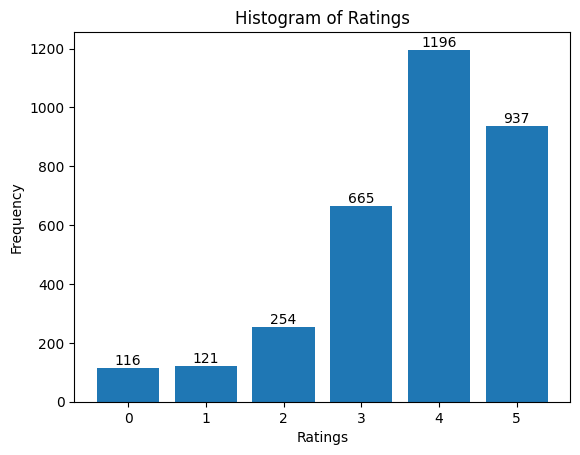

In [39]:
# Get distribution of ratings and sort by index (ratings)
ratings_counts = book_ratings['rating'].value_counts().sort_index()

# Create a list of all possible ratings (0 to 5)
all_ratings = range(6)

# Create a dictionary to map ratings to their counts (filling in missing ratings with 0)
rating_count_dict = {rating: ratings_counts.get(rating, 0) for rating in all_ratings}

# Plotting the distribution in a histogram
plt.bar(list(rating_count_dict.keys()), list(rating_count_dict.values()))
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Histogram of Ratings')

# Adding values above the bars
for rating, count in rating_count_dict.items():
    plt.text(rating, count, str(count), ha='center', va='bottom')

plt.xticks(list(rating_count_dict.keys()))
plt.show()


**Summary:**
It appears there is some data where the ratings are 0. The ratings on the website only go from 1 to 5 inclusive.

## Data Wrangling

In [40]:
# Filter ratings that are out of range
book_ratings = book_ratings[book_ratings['rating']!=0]

In [41]:
# Prepare data for surprise: build a Suprise reader object
reader = Reader(rating_scale=(1, 5))

## Build a recommender system using `Surprise`

In [ ]:
# Load `book_ratings` into a Surprise Dataset
rec_data = Dataset.load_from_df(book_ratings[['user_id','book_id','rating']], reader)

In [42]:
# Create a 80:20 train-test split and set the random state to 7
trainset, testset = train_test_split(rec_data, test_size=.2, random_state=7)

In [43]:
# Use KNNBasice from Surprise to train a collaborative filter
nn_algo = KNNBasic()
nn_algo.fit(trainset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [44]:
# Evaluate the recommender system
predictions = nn_algo.test(testset)
accuracy.rmse(predictions)

RMSE: 1.1122


1.1121748936202605

## Hyperparameter Tuning

In [46]:
# Define a parameter grid to search for optimal hyperparameters
param_grid = {
    'k': [10, 20, 30],
    'sim_options': {
        'name': ['cosine', 'pearson', 'msd'],
        'user_based': [True, False]
    },
    'min_k': [1, 2, 5]
}

# Create a grid search object
grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(rec_data)

# Get the best RMSE score and the corresponding hyperparameters
best_rmse = grid_search.best_score['rmse']
best_params = grid_search.best_params['rmse']

print("Best RMSE: {:.4f}".format(best_rmse))
print("Best Hyperparameters:", best_params)


Best RMSE: 1.0639
Best Hyperparameters: {'k': 10, 'sim_options': {'name': 'cosine', 'user_based': True}, 'min_k': 1}


**Summary:** 
We are able to to reduce the root-mean-square error (RMSE) from 1.1122 to 1.0639 using hyperparameter tuning.

## Refit Model with Tuned Hyperparameters

In [50]:
# Create a new KNNBasic model with the best hyperparameters
best_k = 10
best_sim_options = {
    'name': 'cosine',
    'user_based': True
}
best_min_k = 1

nn_algo = KNNBasic(k=best_k, sim_options=best_sim_options, min_k=best_min_k)

# Fit the model to the training data
nn_algo.fit(trainset)

# Prediction on a user who gave the "The Three-Body Problem" a rating of 5
predicted_rating = nn_algo.predict('8842281e1d1347389f2ab93d60773d4d', '18007564').est

print("Predicted Rating:", predicted_rating)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Predicted Rating: 3.822301024428684


**Summary:** 
Refitting the KNNBasic model using the best hyperparameters we obtained from the grid search leads to a prediction of 3.82 for the user who gave the "The Three-Body Problem" a rating of 5, suggesting we get fairly close to accurately predicting their rating.